### RNN

Redes neurais recorrentes é um tipo de arquitetura de redes neurais poderosas útil para resolver problemas. A grande utilidade de RNN é o fato de que ela rastreia a informação sequencial passada na setença. Com o treinamento, a RNN propõe definir duas matrizes de pesos $W_{h}$ e $W_{x}$ que vão ser capazes de considerar as informações de cada elemento de entrada na hora de gerar uma saída.

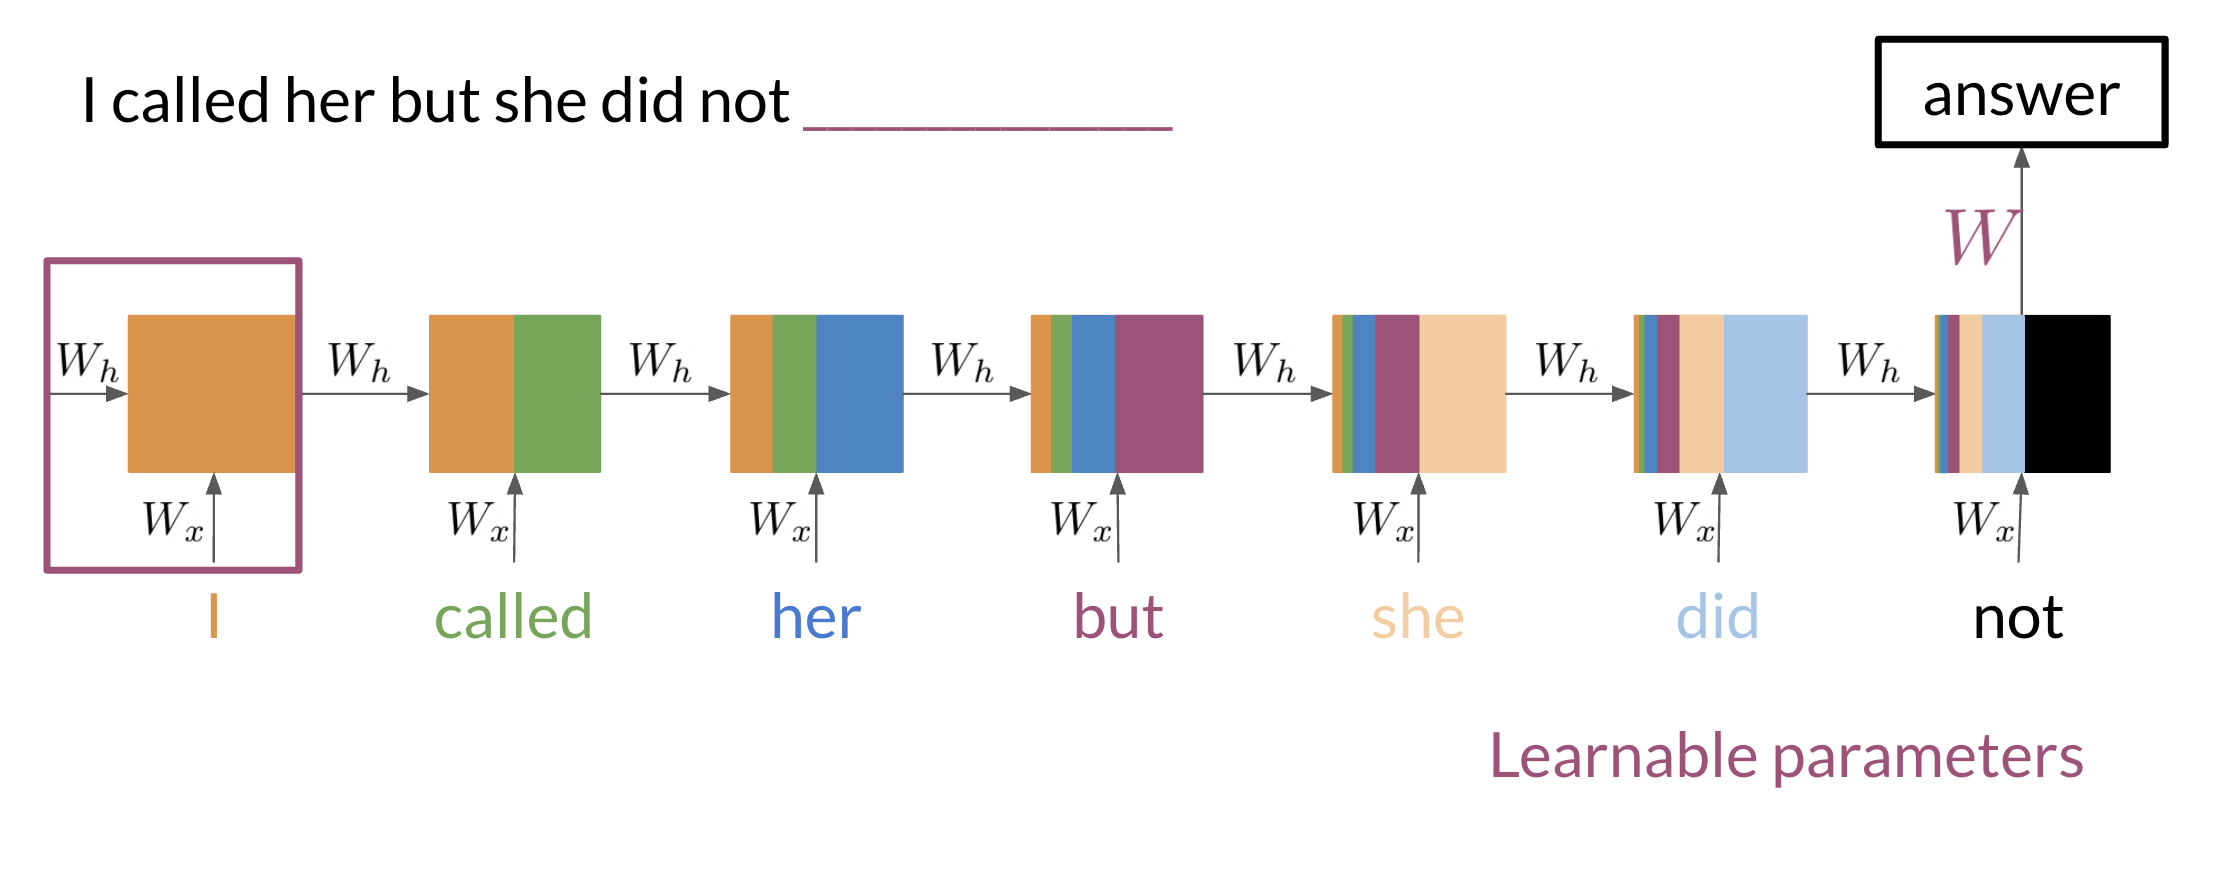

Podemos implementar o modelo RNN de algumas formas:

- One to One: Aqui não é útil aplicar RNN, mas a ideia é que de um conjunto de informações independentes você vai gerar uma saída.
- One to Many: A partir de uma única informação você vai gerar varias saídas, ou uma saída em sequência. Transcrição de imagens.
- Many to Many: A partir de várias informações, são geradas uma sequência de informações. Tradução de um idioma para outro.
- Many to One: A partir de várias informações em sequência, será gerada uma resposta. Análise de sentimento.



In [1]:
import pandas as pd
data = pd.read_csv("datasets/training.1600000.processed.noemoticon.csv")
data.head()

,class,id,date,hasQuery,user,message
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [2]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=.5)

In [3]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorizer = TextVectorization(output_mode = "int", max_tokens=10000)
vectorizer.adapt(train.message.to_list())

test_tensor = vectorizer(test.message)
test_tensor = test_tensor.numpy()

### RNN Simples

Aqui a gente observa a diferença de uma rene neural padrão (Usando só relu e softmax) em relação a uma rede neural usando RNN. Enquanto a outra arquitetura atinge uma acurácia de 83%, esse caso já superou essa acurácia na quinta época.

A dispeito disso também ficou claro um overfitting usando essa arquitetura. Visto que mesmo com uma acurácia de 96% para a amostra usada, o conjunto de validação ficou em 74%.


In [15]:
from tensorflow import keras

my_tensor = vectorizer(train.message)
my_tensor = my_tensor.numpy()

model = keras.Sequential([
    keras.layers.Embedding(len(vectorizer.get_vocabulary()), 64, input_length= my_tensor.shape[1]),
    keras.layers.SimpleRNN(64),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=2, activation='softmax'),
])

model.summary()

model.compile(optimizer='adam', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    x = my_tensor,
    y = pd.get_dummies(train["class"]).to_numpy(), 
    epochs=20, 
    steps_per_epoch=300,
    validation_split=0.5
)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 36, 64)            640000    
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 130       
Total params: 652,546
Trainable params: 652,546
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
300/300 [==============================] - 52s 170ms/step - loss: 0.4822 - accuracy: 0.7662 - val_loss: 0.4386 - val_accuracy: 0.7943
Epoch 2/20
300/300 [==============================] - 51s 171ms/step - loss: 0.4190 - accuracy: 0.806

In [16]:
from tensorflow import keras

my_tensor = vectorizer(train.message)
my_tensor = my_tensor.numpy()

model = keras.Sequential([
    keras.layers.Embedding(len(vectorizer.get_vocabulary()), 64, input_length= my_tensor.shape[1]),
    keras.layers.GRU(64),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=2, activation='softmax'),
])

model.summary()

model.compile(optimizer='adam', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    x = my_tensor,
    y = pd.get_dummies(train["class"]).to_numpy(), 
    epochs=20, 
    steps_per_epoch=300,
    validation_split=0.5
)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 36, 64)            640000    
_________________________________________________________________
gru (GRU)                    (None, 64)                24960     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 130       
Total params: 669,250
Trainable params: 669,250
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
300/300 [==============================] - 102s 331ms/step - loss: 0.6876 - accuracy: 0.5135 - val_loss: 0.5463 - val_accuracy: 0.7338
Epoch 2/20
300/300 [==============================] - 96s 321ms/step - loss: 0.4514 - accuracy: 0.7